
# Convolutional Neural Networks (CNN)

In 1989, inspired by the study of the brain's visual cortex, [Yann LeCunn](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf) first proposed the CNN model. 
As computing power and data for training grows, CNNs is now capable of achieving sucessful performance including visual perception, voice recognition, natural language processing, and others. 

Localizing the perceptions, the *convolutional layer* maps the local receptive fields into one hidden node. Once inputs are mapped to hidden units in the first convolutional layer, the first layer is mapped in the same way with local receptive fields to the next convolutional layer.

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/CNN.png)

To build a convolutional layer to have the same width and height, we can adding *zero padding* around the original image. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/CNN_padding.png)

To reduce the size of the layer, we can increase the *stride* to space out the receptive fields. 
![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/CNN_stride.png)


In [2]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os
import sys
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down
tf.keras.backend.set_floatx('float64')

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# CNN Architecture

Figure 13-9 shows the typical CNN archiecture that has a few convolutional layers and poolin layers alternatively connected, which are followed by fully connected layers. 
The image input gets smaller as the network goes deeper. 

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/CNN_arch.png)


Well, what is convolution and pool? Let us take a look at what happens in the convolution layer with filters first, and then how pooling is processed next. 

# Filters

Each receptive field are mapped to a real value after applying some weights. There are two possible sets of weights, called *filters* or *convoluution kernels*. 
Simple filters as follows are hightlights an area that is similar to the filter pattern. 
Combining multiple filtered neurons, it learns to combine them into complex patterns. 


In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") /255
image = china[150:220, 130:250]
#height, width, channels = image.shape
#image_grayscale = image.mean(axis=2).astype(np.float32)
#images = image_grayscale.reshape(1, height, width, 1)

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

print(batch_size, height, width, channels)

2 427 640 3


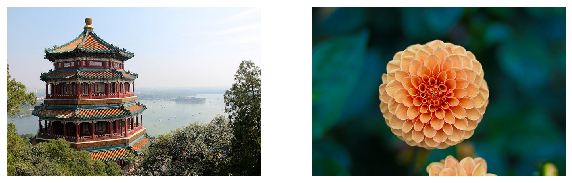

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plot_image(images[0])
plt.subplot(122)
plot_image(images[1])

These are two images that we will first play with. Let us think of two very simple filters as below. 

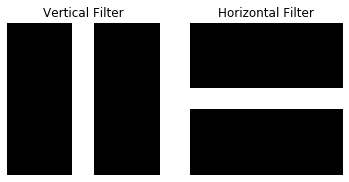

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line


plt.figure(figsize=(6,10))
plt.subplot(121)
plot_image(filters[:, :, 0, 0])
plt.title("Vertical Filter")
plt.subplot(122)
plot_image(filters[:, :, 0, 1])
plt.title("Horizontal Filter")
plt.show()

print(filters[:, :, 0, 1])

What do you think it will happen if we apply the filter on the two images? Let us follow the codes and see the effects.

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

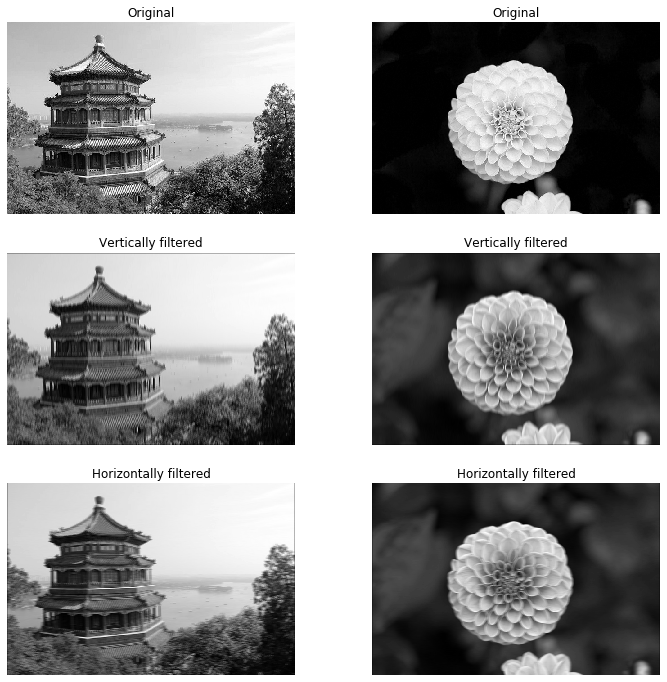

In [7]:

plt.figure(figsize=(12, 12))
for i in range(2):
    plt.subplot(3, 2, i+1)
    plot_image(images[i, :, :, 0])
    plt.title("Original")

    plt.subplot(3, 2, i+3)
    plot_image(outputs[i, :, :, 0])
    plt.title("Vertically filtered")

    plt.subplot(3, 2, i+5)
    plot_image(outputs[i, :, :, 1])
    plt.title("Horizontally filtered")


Wait. If don't glace it, you may notice some blurred below two rows comparing the images in the top row. Let us take a close look at one of them.  

In [8]:
def crop(images):
    return images[150:220, 130:250]

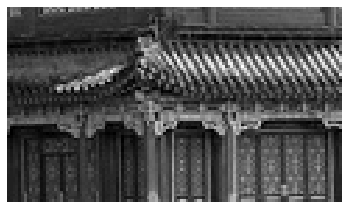

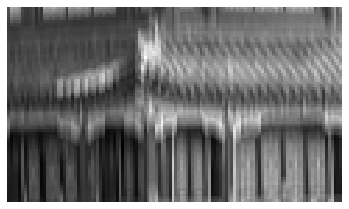

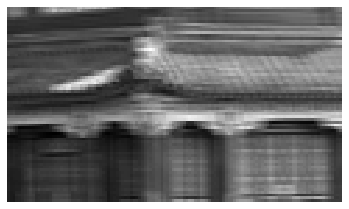

In [9]:
plot_image(crop(images[0, :, :, 0]))
#save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    #save_fig(filename, tight_layout=False)
    plt.show()

Do you see how the filters work? 

## Convolutional Layer

Using keras.layers.Conv2D(), we can build the convolutional layer as:

In [10]:
conv = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

# Pooling

To reduuce the computational load, memory usage, and the number of parameters, we use pooling layer (ie. max pooling). 
Without having weights in filters, pooling simply aggregates the values in the receptive field by using max or mean operation.

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/CNN_maxpool.png)


In [11]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)


In [13]:
output = max_pool(images)

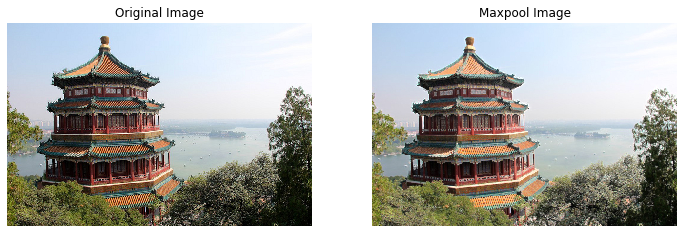

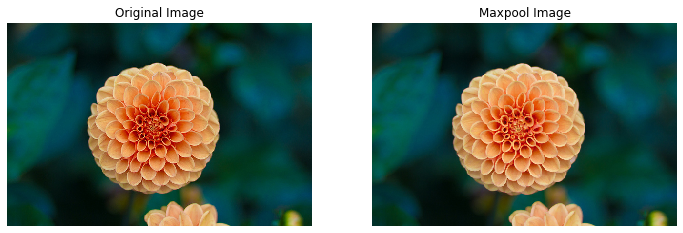

In [14]:

for i in range(2):
    plt.figure(figsize=(12, 12))

    plt.subplot(121)
    plot_image(images[i])
    plt.title("Original Image")

    plt.subplot(122)
    plot_image(output[i])  
    plt.title("Maxpool Image")
    plt.show()

Above images show the comparison of images before and after pooling. Do you see any difference? You may or may not. To see the difference, let us take a close look.

In [15]:
def crop(images):
    return images[150:220, 130:250]

In [16]:
cropped_images = np.array([crop(image) for image in images])
cropped_output = max_pool(cropped_images)

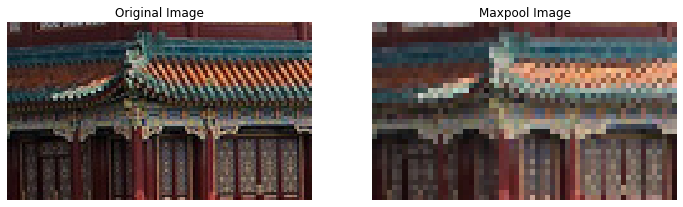

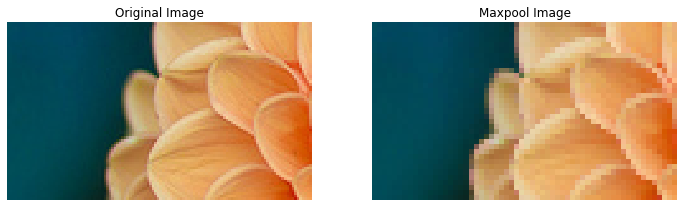

In [17]:

for i in range(2):
    plt.figure(figsize=(12, 12))

    plt.subplot(121)
    plot_image(cropped_images[i])
    plt.title("Original Image")

    plt.subplot(122)
    plot_image(cropped_output[i])  
    plt.title("Maxpool Image")
    plt.show()

After pooling, you can now notice the loss of resolution after pooling as we reduce the image size by averaging or taking maximum values from neighboring pixels. 

# MNIST

Let us build a CNN and practice on MNIST handwritten digit dataset. 

In [18]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv2_fmaps = 64
pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

In [19]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")



model = tf.keras.models.Sequential([
    DefaultConv2D(filters=conv1_fmaps, input_shape=[28, 28, 1]),
    DefaultConv2D(filters=conv2_fmaps),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=n_fc1, activation='relu'),
    tf.keras.layers.Dense(units=n_outputs, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 822,346
Trainable params: 822,346
Non-trainable params: 0
__________________________________________________

## Practice:
Reading the codes, can you draw the architecture?

- Now, let us run this with MNIST data. 

In [20]:
mnist = tf.keras.datasets.mnist
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data()
x_train, x_valid = x_train_all[:-5000], x_train_all[-5000:]
y_train, y_valid = y_train_all[:-5000], y_train_all[-5000:]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

In [21]:
x_train.shape

(55000, 28, 28)

To match with the input_shape, we add a new axis:

In [22]:
x_train = x_train[..., np.newaxis]
x_valid = x_valid[..., np.newaxis]
x_test = x_test[..., np.newaxis]

Well, this codes with the full training dataset will take some time. Please be ready for a proper environment to run. 

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=3, validation_data=[x_valid, y_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 8110s 147ms/sample - loss: 0.1274 - accuracy: 0.9613 - val_loss: 0.0547 - val_accuracy: 0.9844
Epoch 2/3
55000/55000 [==============================] - 7002s 127ms/sample - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0540 - val_accuracy: 0.9862
Epoch 3/3
55000/55000 [==============================] - 6675s 121ms/sample - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0479 - val_accuracy: 0.9900


In [26]:
score = model.evaluate(x_test, y_test)
score

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.044443687174405076, 0.9857]

In [31]:
x_new = x_test[:10] # pretend we have new images
y_pred = model.predict(x_new)

In [30]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [33]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [35]:
y_pred

array([[1.853e-08, 3.637e-11, 1.843e-05, 2.448e-05, 2.876e-13, 9.092e-08,
        7.800e-15, 1.000e+00, 2.601e-08, 2.848e-08],
       [4.994e-07, 2.815e-08, 1.000e+00, 1.586e-13, 1.361e-12, 6.768e-13,
        1.873e-08, 1.601e-14, 2.223e-07, 1.809e-12],
       [3.695e-07, 9.989e-01, 8.690e-07, 3.362e-08, 1.700e-04, 1.020e-06,
        8.917e-06, 6.924e-04, 2.645e-04, 1.871e-06],
       [9.991e-01, 9.503e-09, 2.064e-07, 8.338e-10, 4.001e-09, 4.723e-08,
        8.914e-04, 9.830e-08, 1.438e-07, 2.901e-09],
       [4.387e-08, 7.639e-09, 7.089e-11, 2.311e-10, 1.000e+00, 1.059e-11,
        2.369e-08, 4.790e-09, 7.789e-07, 3.495e-05],
       [2.692e-07, 9.992e-01, 8.343e-08, 3.550e-09, 2.199e-05, 1.635e-07,
        1.425e-06, 6.635e-04, 8.312e-05, 1.938e-06],
       [1.471e-10, 6.139e-05, 8.901e-07, 6.630e-06, 9.630e-01, 4.603e-06,
        1.983e-07, 1.647e-05, 3.629e-02, 6.132e-04],
       [1.949e-09, 2.080e-06, 1.300e-06, 1.542e-05, 2.962e-04, 6.391e-05,
        6.387e-11, 9.236e-08, 7.249e-

If you want to print more readable numbers without scientific notations, use this command. It will show only 3 digits under the decimal point.

In [ ]:
np.set_printoptions(precision=3, suppress=True)

We have observed how CNN mimics human eyes (retina) to deal with image input to identify or classify them. If you are interested in CNN, you can read some of these papers:

* [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks, by Shaoqing R., Kaiming H., Ross B. G. & Jian S. (2015)](https://arxiv.org/pdf/1506.01497.pdf)
* [U-Net: Convolutional Networks for Biomedical Image Segmentation, by Olaf R., Philipp F. &Thomas B. (2015)](https://arxiv.org/pdf/1505.04597.pdf)
* [Image Super-Resolution Using Deep Convolutional Networks, by Chao D., Chen C., Kaiming H. & Xiaoou T.](https://arxiv.org/pdf/1501.00092.pdf)
* [Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning, by Christian S., Sergey I., Vincent V. & Alexander A A. (2017)](https://arxiv.org/pdf/1602.07261.pdf)
* [Character-level convolutional networks for text classification, by Xiang Z., Junbo Jake Z. & Yann L. (2015)](http://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf)